In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

### 单变量分布

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


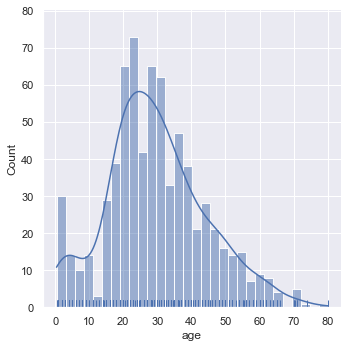

In [4]:
sns.set(color_codes = True)
titanic = titanic[~np.isnan(titanic['age'])]
sns.displot(titanic['age'],bins = 30,rug = True, kde=True)

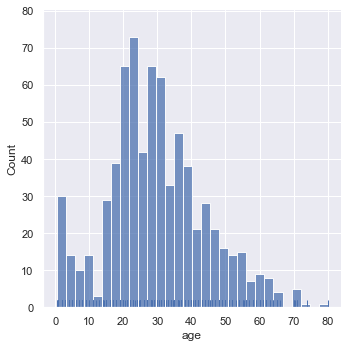

In [5]:
sns.displot(titanic['age'].dropna(),bins = 30,rug = True)  # 去除NAN值的另一种写法

### 二变量分布

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


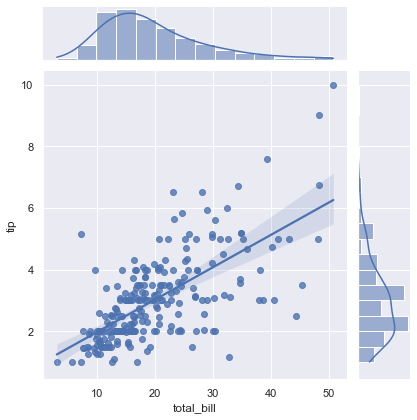

In [12]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips,kind = 'reg')  # 'reg'可以设置回归绘图和核密度曲线

### 六边形图

In [13]:
athletes = pd.read_csv('athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


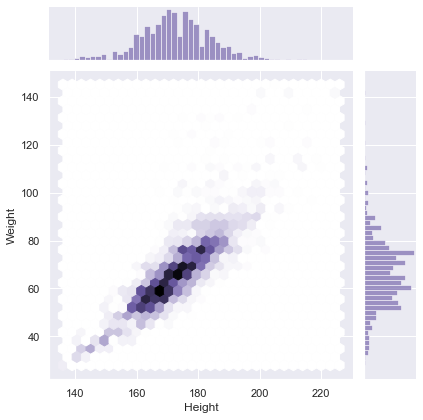

In [20]:
china_athletes = athletes[athletes['NOC'] == 'CHN']
sns.jointplot(x = 'Height', y = 'Weight',data = china_athletes, kind = 'hex',gridsize = 30, color = 'm')

### 成对绘图

In [21]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


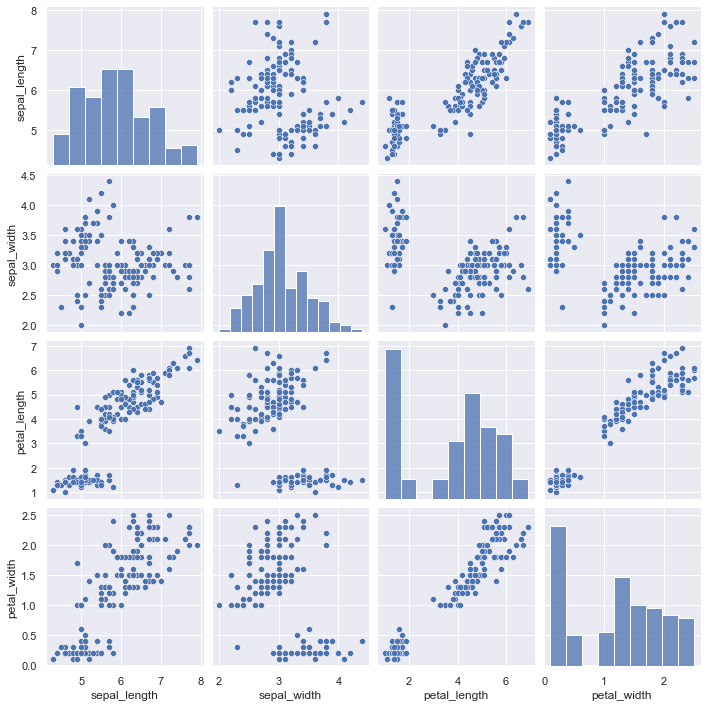

In [22]:
sns.pairplot(iris)

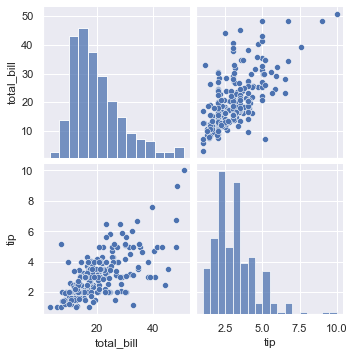

In [24]:
sns.pairplot(tips,vars = ['total_bill','tip'])

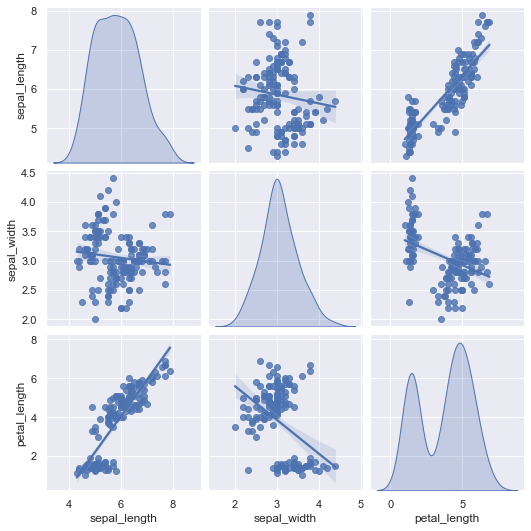

In [27]:
sns.pairplot(iris,vars = ['sepal_length','sepal_width','petal_length'], 
             diag_kind = 'kde', kind = 'reg')

## 笔记：
1. 单一变量绘图：使用`displot`，这个函数不仅可以绘制直方图，还可以绘制KDE曲线和rug线，rug线越集中，说明数据约集中
2. 多变量绘图：使用`jointplot`，这个函数比传统的散点图可以展示更多的信息，在顶部和右侧展示两个直方图。
3. 成对绘图：使用`pairplot`，通过`vars`参数控制需要绘制数据集中的某几个字段，斜对角的图，表示的是数据集中，单一列的分布情况